In [2]:
# customary imports:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import StratifiedKFold

## 1. Download the white blood cell classification data
The data is hosted online, so we can use the linux command `wget` to download it. If you run into any issues with the data download, please just share your challenges via Slack and we can help sort them out.

In [2]:
# if this breaks please contact the TAs
!wget -O data.zip https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded
!unzip /content/data.zip
!unzip /content/PBC_dataset_normal_DIB.zip > /dev/null

Streaming output truncated to the last 5000 lines.
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_935950.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_890863.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_519370.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_215077.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_388154.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_968896.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_34345.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_349907.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_245683.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_785122.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_615525.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_714613.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_904757.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_38351.jpg  
  inflating: PBC_dataset_no

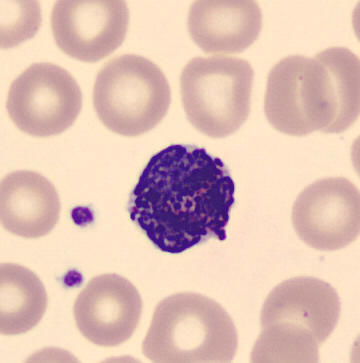

In [3]:
# loading a sample image
sample_image = Image.open("PBC_dataset_normal_DIB/basophil/BA_100102.jpg")
sample_image

(12432, 128, 128, 1) (12432, 8)
(3109, 128, 128, 1) (3109, 8)


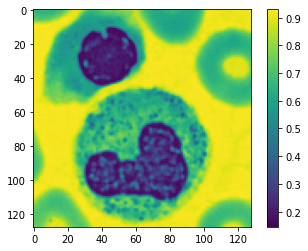

In [3]:
def load_and_crop(image_path, crop_size, normalized=True):
    image = Image.open(image_path).resize([200,200])
    width, height = image.size   # Get dimensions
    left = (width - crop_size)/2
    top = (height - crop_size)/2
    right = (width + crop_size)/2
    bottom = (height + crop_size)/2
    # Crop the center of the image
    image = ImageOps.grayscale(image.crop((left, top, right, bottom)))
    if normalized:
        return np.array(image).astype(np.float32) / 255.0
    else:
        return np.array(image).astype(np.float32)

# code to load all the data, assuming dataset is at PBC_dataset_normal_DIB relative path
cell_types = ['basophil', 'eosinophil', 'erthroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
cell_inds = np.arange(0, len(cell_types))
x_data = []
y_data = []
for cell_ind in cell_inds:
    all_images = glob.glob(os.path.join('PBC_dataset_normal_DIB', cell_types[cell_ind], '*.jpg'))
    x_data += [load_and_crop(image_path, 128) for image_path in all_images]
    y_data += [cell_ind]*len(all_images)

# adding a fake color channel
x_data = np.array(x_data).reshape(-1, 128, 128, 1)
y_data = np.array(y_data)

folder = StratifiedKFold(5, shuffle=True)
x_indices = np.arange(0, len(x_data))
train_indices, val_indices = folder.split(x_indices, y_data).__next__()
# shuffling
np.random.shuffle(train_indices)

x_train = x_data[train_indices]
y_train = np.eye(len(cell_types))[y_data[train_indices]]

x_val = x_data[val_indices]
y_val = np.eye(len(cell_types))[y_data[val_indices]]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

plt.imshow(x_train[0,:,:,0])
plt.colorbar()

## 2. Define a keras model
You can either use the sequential model class, or the functional model declaration

(a) Please define your model with the following layers:
1. A convolutional layer with a 5x5 kernel and stride of 1
2. A convolutional layer with a 5x5 kernel and stride of 1
3. A pooling layer (Instead of this, you could also increase the stride in the second layer)
4. A convolutional layer with a 5x5 kernel and stride of 1
5. A convolutional layer with a 5x5 kernel and stride of 1
6. A pooling layer (Instead of this, you could also increase the stride in the fifth layer)
7. A Dense layer
8. Output layer of size 8

You are free to choose the sizes, number of channels and activations (i.e., the employed non-linearity) for each of the layers.

(b) Now, please comment out the pooling layer in step 3 and step 6, and instead increase the stride in the appropriate layers to achieve the same down-sampling effect (i.e., to reduce the size of the tensor in the same way as pooling) 

(c) After defining the model, you should define an optimizer and set a learning rate. You also should pick a loss function.

(d) Run the optimization for 10-15 epochs and monitor the training and validation loss and accuracy. After training is done, please plot two graphs, one showing the training and validation losses as two curves within the same plot, and a second graph that shows the the training and validation accuracies as two curves within the same plot. For both plots, please let epoch be the horizontal axis.

At the end of training, you should be able obtain an accuracy better than 80%.

You may refer to the notebook from the TA session or any online TensorFlow resources for guidance.

In [ ]:
# import modules
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from keras import Model
from keras.utils.vis_utils import plot_model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       208       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      3216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        51264     
                                                             

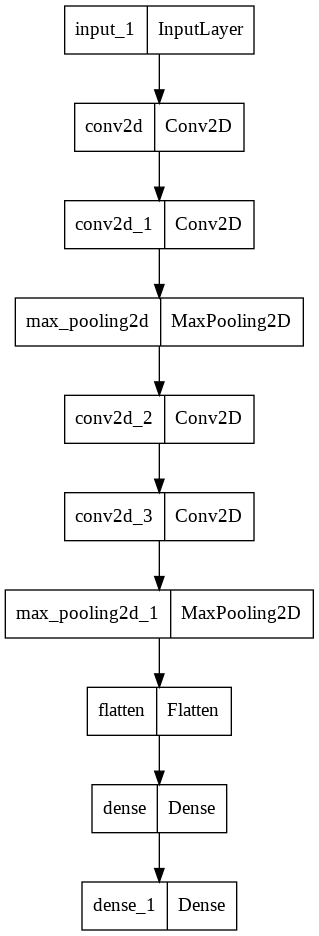

In [ ]:
# Part a
input_layer = Input((128, 128, 1))
conv_1 = Conv2D(filters=8, kernel_size=5, strides=1, padding='same', activation='relu')(input_layer)
conv_2 = Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu')(conv_1)
pool_1 = MaxPool2D(2)(conv_2)
conv_3 = Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(pool_1)
conv_4 = Conv2D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu')(conv_3)
pool_2 = MaxPool2D(2)(conv_4)
flat = Flatten()(pool_2)
dense_1 = Dense(64, activation="relu")(flat)
output = Dense(8, activation='softmax')(dense_1)
model = Model(inputs=input_layer, outputs=output)

print(model.summary())
plot_model(model)



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 8)       208       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        3216      
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                4194

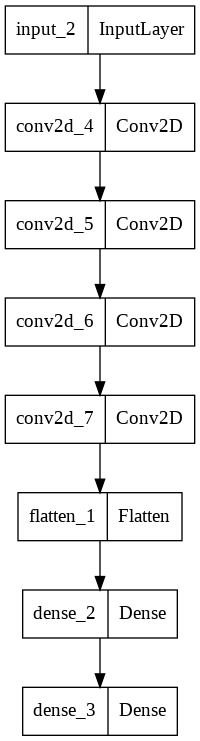

In [ ]:
# Part b
input_layer = Input((128, 128, 1))
conv_1 = Conv2D(filters=8, kernel_size=5, strides=1, padding='same', activation='relu')(input_layer)
conv_2 = Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu')(conv_1)
# pool_1 = MaxPool2D(2)(conv_2)
conv_3 = Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(conv_2)
conv_4 = Conv2D(filters=64, kernel_size=5, strides=2, padding='same', activation='relu')(conv_3)
# pool_2 = MaxPool2D(2)(conv_4)
flat = Flatten()(conv_4)
dense_1 = Dense(64, activation="relu")(flat)
output = Dense(8, activation='relu')(dense_1)
model = Model(inputs=input_layer, outputs=output)

print(model.summary())
plot_model(model)



In [ ]:
# part c
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt,  # pick an optimizer
                     loss='categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [ ]:
# part d
history = model.fit(x_train, y_train,
              epochs=10,
              validation_data=(x_val, y_val))

Epoch 1/10
389/389 [==============================] - 11s 28ms/step - loss: 1.3887 - accuracy: 0.4512 - val_loss: 0.9232 - val_accuracy: 0.6488
Epoch 2/10
389/389 [==============================] - 11s 27ms/step - loss: 0.9132 - accuracy: 0.6478 - val_loss: 0.7776 - val_accuracy: 0.7038
Epoch 3/10
389/389 [==============================] - 11s 27ms/step - loss: 0.7307 - accuracy: 0.7227 - val_loss: 0.9136 - val_accuracy: 0.6568
Epoch 4/10
389/389 [==============================] - 11s 27ms/step - loss: 0.6182 - accuracy: 0.7730 - val_loss: 0.6380 - val_accuracy: 0.7620
Epoch 5/10
389/389 [==============================] - 11s 28ms/step - loss: 0.5556 - accuracy: 0.7936 - val_loss: 0.9391 - val_accuracy: 0.6459
Epoch 6/10
389/389 [==============================] - 11s 27ms/step - loss: 0.4998 - accuracy: 0.8102 - val_loss: 0.5635 - val_accuracy: 0.8022
Epoch 7/10
389/389 [==============================] - 11s 28ms/step - loss: 0.5402 - accuracy: 0.8001 - val_loss: 0.6836 - val_accuracy:

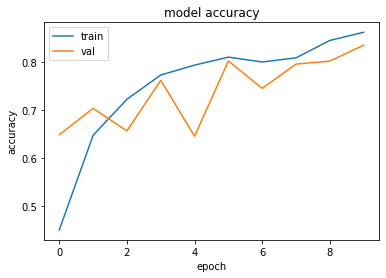

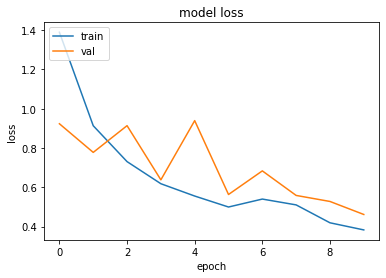

In [ ]:
# part d plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 3. How many weight parameters does your network have?
First try calculating this number by hand, and show your work (please type out the multiplications that you are performing to arrive at the final number.) Then, please verify the answer using Keras's autogenerated model summary.

Hand Calculation of Weights: <br><br>

Convolution 1: ((5x5)+1)x8 = 208 weights <br>
Convolution 2: ((5x5x8)+1)x16 = 3,216 weights <br>
Convolution 3: ((5x5x16)+1)x32 = 12,832 weights <br>
Convolution 4: ((5x5x32)+1)x64 = 51,264 weights <br>
Dense 1: (128x128x128x2)+64 = 4,194,368 weights<br>
Dense 2: (64x8)+8 = 520 weights<br>

Total weights is the sum of weights at each layer: <br>
Total weights = 208+3216+12832+51264+4194368+520 = 4,262,408 weights <br>

This value matches the keras output value generated by model.summary()!


In [ ]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       208       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      3216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        12832     
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        51264     
                                                           

## 4. Visualise filters
You can obtain weights in individual layers by running 
```
your_model_variable.layers[layer_index].get_weights()
```
(a) Plot all convolution kernels (i.e., each set of 5x5 weights) in your first convolutional layer.

(b) What is the variance of final weights in the first convolutional layer? 

(c) Also plot some of the convolutional weights in the second layer. What is the variance of the final weights in the second layer? 


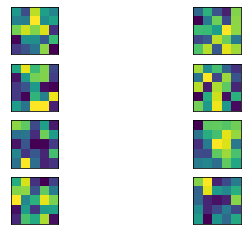

In [ ]:
# part a
weights, biases = model.layers[1].get_weights()
interval = 1
for i in range(8):
  f = weights[:,:,:,i]
  for j in range(1):
    ax = plt.subplot(4,2,interval)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, j])
    interval+=1
plt.show()

In [ ]:
# part b
import numpy as np
variance = np.var(weights)
print(variance)

0.013370296


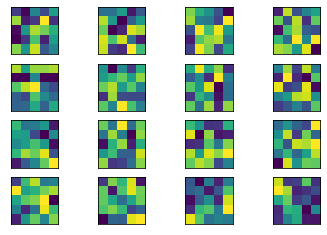

0.003593861


In [ ]:
# part c

weights, biases = model.layers[2].get_weights()
interval = 1
for i in range(16):
  f = weights[:,:,:,i]
  for j in range(1):
    ax = plt.subplot(4,4,interval)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, j])
    interval+=1
plt.show()

variance = np.var(weights)
print(variance)

The second convolutional layer demonstrated a reduced the variance of weights

## 5. Try playing with the learning rate
(a) Try to increase and decrease the learning rate and plot the training and validation loss and accuracy curves from part 2(d), for three different values of learning rate that you have tried. 

(b) Please comment on any trends that you can identify between how the plots change as a function of learning rate. Specifically, what happens to the slopes of the training loss and accuracy as a function of learning rate?

Epoch 1/10
389/389 [==============================] - 12s 29ms/step - loss: 2.0334 - accuracy: 0.1918 - val_loss: 1.9888 - val_accuracy: 0.1856
Epoch 2/10
389/389 [==============================] - 11s 28ms/step - loss: 1.9427 - accuracy: 0.2244 - val_loss: 1.9052 - val_accuracy: 0.2158
Epoch 3/10
389/389 [==============================] - 11s 28ms/step - loss: 1.8820 - accuracy: 0.2516 - val_loss: 1.8607 - val_accuracy: 0.3249
Epoch 4/10
389/389 [==============================] - 11s 27ms/step - loss: 1.8397 - accuracy: 0.2925 - val_loss: 1.8159 - val_accuracy: 0.3278
Epoch 5/10
389/389 [==============================] - 11s 29ms/step - loss: 1.7879 - accuracy: 0.3554 - val_loss: 1.7537 - val_accuracy: 0.3483
Epoch 6/10
389/389 [==============================] - 11s 28ms/step - loss: 1.7041 - accuracy: 0.4537 - val_loss: 1.6420 - val_accuracy: 0.5137
Epoch 7/10
389/389 [==============================] - 11s 28ms/step - loss: 1.5556 - accuracy: 0.4885 - val_loss: 1.4543 - val_accuracy:

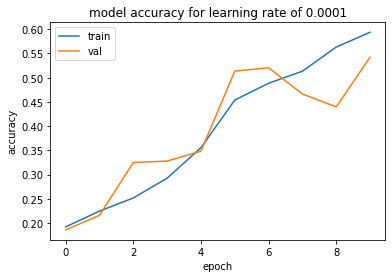

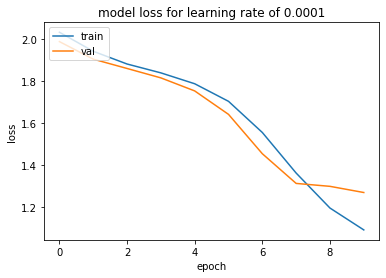

Epoch 1/10
389/389 [==============================] - 12s 29ms/step - loss: 1.6683 - accuracy: 0.3398 - val_loss: 1.8601 - val_accuracy: 0.3332
Epoch 2/10
389/389 [==============================] - 11s 28ms/step - loss: 1.2205 - accuracy: 0.5181 - val_loss: 1.4796 - val_accuracy: 0.4255
Epoch 3/10
389/389 [==============================] - 11s 28ms/step - loss: 1.0067 - accuracy: 0.6069 - val_loss: 1.0171 - val_accuracy: 0.5944
Epoch 4/10
389/389 [==============================] - 11s 28ms/step - loss: 0.8766 - accuracy: 0.6675 - val_loss: 1.1579 - val_accuracy: 0.5680
Epoch 5/10
389/389 [==============================] - 11s 28ms/step - loss: 0.8165 - accuracy: 0.6961 - val_loss: 0.7885 - val_accuracy: 0.7141
Epoch 6/10
389/389 [==============================] - 11s 28ms/step - loss: 0.7857 - accuracy: 0.7079 - val_loss: 0.8642 - val_accuracy: 0.6912
Epoch 7/10
389/389 [==============================] - 11s 28ms/step - loss: 0.7626 - accuracy: 0.7153 - val_loss: 0.8683 - val_accuracy:

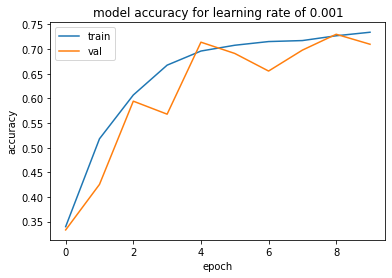

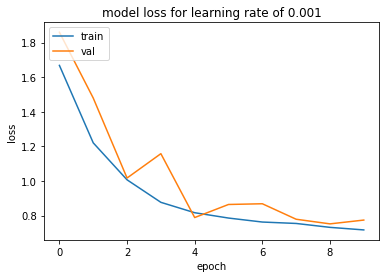

Epoch 1/10
389/389 [==============================] - 12s 29ms/step - loss: 1.5358 - accuracy: 0.3847 - val_loss: 1.2927 - val_accuracy: 0.4252
Epoch 2/10
389/389 [==============================] - 11s 29ms/step - loss: 1.0514 - accuracy: 0.5887 - val_loss: 0.8737 - val_accuracy: 0.6800
Epoch 3/10
389/389 [==============================] - 11s 28ms/step - loss: 0.8824 - accuracy: 0.6575 - val_loss: 0.8076 - val_accuracy: 0.6838
Epoch 4/10
389/389 [==============================] - 11s 29ms/step - loss: 0.7799 - accuracy: 0.7038 - val_loss: 0.7173 - val_accuracy: 0.7337
Epoch 5/10
389/389 [==============================] - 11s 28ms/step - loss: 0.7057 - accuracy: 0.7348 - val_loss: 0.6427 - val_accuracy: 0.7713
Epoch 6/10
389/389 [==============================] - 11s 28ms/step - loss: 0.6492 - accuracy: 0.7607 - val_loss: 0.8824 - val_accuracy: 0.6581
Epoch 7/10
389/389 [==============================] - 11s 28ms/step - loss: 0.6038 - accuracy: 0.7819 - val_loss: 0.6161 - val_accuracy:

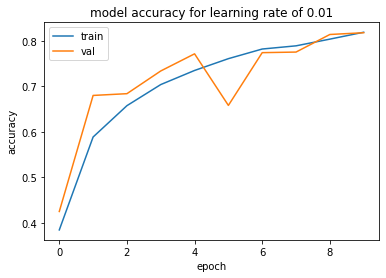

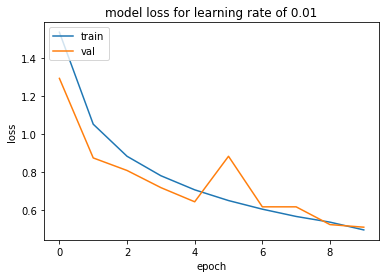

In [ ]:
# part a


def tune_learn(learning_rate):
  input_layer = Input((128, 128, 1))
  conv_1 = Conv2D(filters=8, kernel_size=5, strides=1, padding='same', activation='relu')(input_layer)
  conv_2 = Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu')(conv_1)
  pool_1 = MaxPool2D(2)(conv_2)
  conv_3 = Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(pool_1)
  conv_4 = Conv2D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu')(conv_3)
  pool_2 = MaxPool2D(2)(conv_4)
  flat = Flatten()(pool_2)
  dense_1 = Dense(64, activation="relu")(flat)
  output = Dense(8, activation='softmax')(dense_1)
  model = Model(inputs=input_layer, outputs=output)

  # optimizer generation and compiling mdoel
  opt = SGD(learning_rate=learning_rate)
  model.compile(optimizer=opt,  # pick an optimizer
                     loss='categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])
  history = model.fit(x_train, y_train,
              epochs=10,
              validation_data=(x_val, y_val))
  return history

def plot(history, learning_rate):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy for learning rate of {}'.format(learning_rate))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss for learning rate of {}'.format(learning_rate))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

learning_rate_list = [0.0001, 0.001, 0.01]
for item in learning_rate_list:
  model_hist = tune_learn(item)
  plot(model_hist, item)





As you can see, as you increase the learning rate, initially the slope for accuracy and training loss as a function of epoch increases (the training loss slope is decreasing sharper and thus has a larger negative initial slope). This is because the learning rate is essentially "step size", which means it will take larger steps in the direction of steepest descent gradient, which means it will take larger steps intially in the steepest descent until it begins fitting the data "well" and the slopes tail off (because the gradient descent begins approaches a minima and thus is manifested in a small change in accuracy and loss as we propogate the model more epochs).

In summary, larger learning rates will generally have larger slopes for both accuracy and loss (larger negative slope) as a function of epoch. 

## 6. Adding Batch Norm
Fix a value of the learning rate and try adding Batch Normalization after layers 2 and 5. Does it improve the performance of your model? Explain briefly.

Epoch 1/10
389/389 [==============================] - 40s 78ms/step - loss: 0.7778 - accuracy: 0.7181 - val_loss: 1.4465 - val_accuracy: 0.4995
Epoch 2/10
389/389 [==============================] - 30s 77ms/step - loss: 0.4057 - accuracy: 0.8533 - val_loss: 1.0675 - val_accuracy: 0.6057
Epoch 3/10
389/389 [==============================] - 29s 75ms/step - loss: 0.2870 - accuracy: 0.8986 - val_loss: 0.3818 - val_accuracy: 0.8633
Epoch 4/10
389/389 [==============================] - 29s 75ms/step - loss: 0.2229 - accuracy: 0.9221 - val_loss: 0.4863 - val_accuracy: 0.8318
Epoch 5/10
389/389 [==============================] - 30s 77ms/step - loss: 0.1658 - accuracy: 0.9458 - val_loss: 0.3416 - val_accuracy: 0.8800
Epoch 6/10
389/389 [==============================] - 30s 76ms/step - loss: 0.1239 - accuracy: 0.9644 - val_loss: 0.8792 - val_accuracy: 0.7417
Epoch 7/10
389/389 [==============================] - 31s 78ms/step - loss: 0.0950 - accuracy: 0.9756 - val_loss: 0.3335 - val_accuracy:

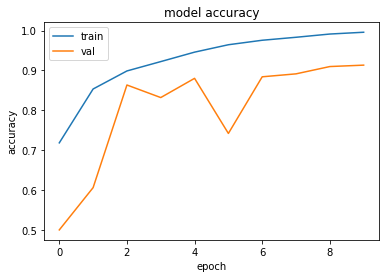

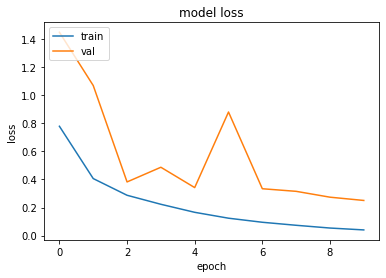

In [ ]:
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

input_layer = Input((128, 128, 1))
conv_1 = Conv2D(filters=8, kernel_size=5, strides=1, padding='same', activation='relu')(input_layer)
conv_2 = Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu')(conv_1)
batchnorm_1 = BatchNormalization()(conv_2)
pool_1 = MaxPool2D(2)(batchnorm_1)
conv_3 = Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(pool_1)
conv_4 = Conv2D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu')(conv_3)
batchnorm_2 = BatchNormalization()(conv_4)
pool_2 = MaxPool2D(2)(batchnorm_2)
flat = Flatten()(pool_2)
dense_1 = Dense(64, activation="relu")(flat)
output = Dense(8, activation='softmax')(dense_1)
model = Model(inputs=input_layer, outputs=output)

opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt,  # pick an optimizer
                    loss='categorical_crossentropy',  # pick a loss
                    metrics=['accuracy'])
history = model.fit(x_train, y_train,
            epochs=10,
            validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Including two layers of Batch normalization (one after 2nd layer and another after 5th layer) increased the performance of the model with respect to accuracy in both the training data and validation data. It also converged to a smaller model loss value after 10 epochs for both the training and validation data. This is because batch normalization is a form of regularization, where it adds some slight degree of noise to the previous hidden layer, making the overall model more robust.

## 7. Data Augmetation
Now, instead of giving the dataset directly to the network, augment it first using:
```
keras.preprocessing.image.ImageDataGenerator
```
Specifically, use vertical and horizontal flips and 20 degrees rotation. We also want to normalise the data. Feel free to consult the documentation for this function.
What effect does this have on your model?

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
389/389 [==============================] - 35s 88ms/step - loss: 1.1840 - accuracy: 0.5307 - val_loss: 1.0618 - val_accuracy: 0.5780
Epoch 2/10
389/389 [==============================] - 32s 83ms/step - loss: 0.9679 - accuracy: 0.6249 - val_loss: 0.8814 - val_accuracy: 0.6632
Epoch 3/10
389/389 [==============================] - 33s 85ms/step - loss: 0.8752 - accuracy: 0.6655 - val_loss: 0.8777 - val_accuracy: 0.6642
Epoch 4/10
389/389 [==============================] - 32s 83ms/step - loss: 0.8124 - accuracy: 0.6902 - val_loss: 0.7771 - val_accuracy: 0.7054
Epoch 5/10
389/389 [==============================] - 33s 84ms/step - loss: 0.7724 - accuracy: 0.7132 - val_loss: 0.7847 - val_accuracy: 0.6970
Epoch 6/10
389/389 [==============================] - 32s 83ms/step - loss: 0.7398 - accuracy: 0.7247 - val_loss: 0.7311 - val_accuracy: 0.7359
Epoch 7/10
389/389 [==============================] - 32s 83ms/step - loss: 0.7058 - accuracy: 0.7331 - val_loss: 0.7401 - val_accuracy:

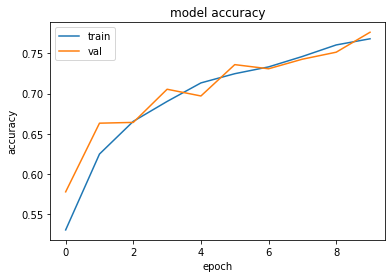

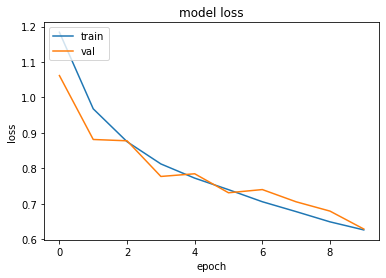

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

input_layer = Input((128, 128, 1))
conv_1 = Conv2D(filters=8, kernel_size=5, strides=1, padding='same', activation='relu')(input_layer)
conv_2 = Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu')(conv_1)
# batchnorm_1 = BatchNormalization()(conv_2)
pool_1 = MaxPool2D(2)(conv_2)
conv_3 = Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')(pool_1)
conv_4 = Conv2D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu')(conv_3)
# batchnorm_2 = BatchNormalization()(conv_4)
pool_2 = MaxPool2D(2)(conv_2)
flat = Flatten()(pool_2)
dense_1 = Dense(64, activation="relu")(flat)
output = Dense(8, activation='softmax')(dense_1)
model = Model(inputs=input_layer, outputs=output)

opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt,  # pick an optimizer
                    loss='categorical_crossentropy',  # pick a loss
                    metrics=['accuracy'])
x

history = model.fit(x=aug.flow(x_train, y_train),
            epochs=10,
            validation_data=aug.flow(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Adding Image augmentation improved our model accuracy by a little bit (about ~4% improvement compared to the second model in part 5 that had the same learning rate of 0.001) for both the validation and training data sets. This is because our model is able to become more robust by training the network to "look" at images from a new angle and also images that are flipped. We are essentially feeding the network "unusual" images that are making it more robust.

## 8. Custom layers
In one of the TA sessions, we briefly went over how to implement a custom layer -- specifically, we re-implemented the Dense (or fully-connected) layer. In this part, we will get more practice implementing custom layers.

Please reimplement a simplified version of `tf.keras.layers.Conv2D` using `tf.nn.conv2d`: https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

Note carefully the difference between these two tf constructs. In particular, `tf.keras.layers.Conv2D` is a high-level implementation of the 2D convolution that defines all the parameters under the hood, while `tf.nn.conv2d` requires you to define your own convolutional kernels via `tf.Variable` (you may also use the `add_weight` function if you desire). 
- Your implementation should also include a bias variable, consistent with the default behavior of `tf.keras.layers.Conv2D`.
- Your constructor should accept 4 parameters: filters, kernel_size, strides, and activation.
- You may hard-code the padding as `'SAME'`
- You do not have to implement the string shortcuts for the activations (e.g., if your code handles `tf.nn.relu` but not `'relu'`, that's okay).
- For simplicity, you may assume that kernel_size and strides are integers (i.e., as opposed to lists).
- Initialize all weights using the standard normal distribution.

Note that since you only have to deal with the above 5 input arguments, your implementation will not be as sophisticated as `tf.keras.layers.Conv2D`, which contains many other input arguments. Rather, the point of this exercise is for you to get a better understanding of what tf is doing under the hood so that you are not just blindly using their high-level functions.

Feel free to refer to the notebook from the TA session or any online tf documentation, though please do not copy the source code from tf's native implementation of Conv2D.

After you're done, repeat the CNN defined above, substituting all instances of `tf.keras.layers.Conv2D` with your implementation, and run for 10 epochs. It's okay if you don't get the same accuracy, but it should still improve. Also print out the `.summary()` command to ensure that the number of parameters is the same as before.

In [12]:
class CustomConv2D(tf.keras.layers.Layer):
  def __init__(self, filters, kernel_size, strides, activation):
    super(CustomConv2D, self).__init__()
    self.activation = activation
    self.filters = filters
    self.kernel_size = kernel_size
    self.strides=strides
    
  
  def build(self, input_shape):
    # expect the input_shape to be (batch_size, height, width, filters_previous)
    weight_init = tf.random_normal_initializer()
    self.bias = tf.Variable(initial_value=weight_init(shape=[self.filters]), dtype='float32' ,trainable=True)
    self.weight = tf.Variable(initial_value=weight_init(shape=(self.kernel_size, self.kernel_size, input_shape[-1], self.filters)), dtype='float32' ,trainable=True)
    
  
  def call(self, input):
    x = tf.nn.conv2d(input, self.weight, [1, self.strides, self.strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, self.bias)
    if self.activation == 'relu':
        return tf.nn.relu(x)
    return x

In [14]:
from keras.layers import Input, Dense, MaxPool2D, Flatten
from keras import Model
import keras
from tensorflow.keras.optimizers import SGD


input_layer = Input((128, 128, 1))
conv_1 = CustomConv2D(filters=8, kernel_size=5, strides=1, activation='relu')(input_layer)
conv_2 = CustomConv2D(filters=16, kernel_size=5, strides=1, activation='relu')(conv_1)
# batchnorm_1 = BatchNormalization()(conv_2)
pool_1 = MaxPool2D(2)(conv_2)
conv_3 = CustomConv2D(filters=32, kernel_size=5, strides=1, activation='relu')(pool_1)
conv_4 = CustomConv2D(filters=64, kernel_size=5, strides=1, activation='relu')(conv_3)
# batchnorm_2 = BatchNormalization()(conv_4)
pool_2 = MaxPool2D(2)(conv_4)
flat = Flatten()(pool_2)
dense_1 = Dense(64, activation="relu")(flat)
output = Dense(8, activation='softmax')(dense_1)
model = Model(inputs=input_layer, outputs=output)



opt = SGD(learning_rate=0.01)

print(model.summary())

model.compile(optimizer=opt,  # pick an optimizer
                    loss='categorical_crossentropy',  # pick a loss
                    metrics=['accuracy'])

history = model.fit(x_train, y_train,
            epochs=10,
            validation_data=(x_val, y_val))


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 custom_conv2d_17 (CustomCon  (None, 128, 128, 8)      208       
 v2D)                                                            
                                                                 
 custom_conv2d_18 (CustomCon  (None, 128, 128, 16)     3216      
 v2D)                                                            
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 custom_conv2d_19 (CustomCon  (None, 64, 64, 32)       12832     
 v2D)                                                      

##** Bonus question: Custom layer for Fourier filtering

Note: this problem requires some careful bug-checking

Now, we will implement a custom layer that doesn't exist in keras -- Fourier filtering. Your layer should apply the 2D Fourier transform (`tf.signal.fft2d`) to each channel of the input, multiply element-wise by an optimizable mask (a different one for each channel), apply the 2D inverse Fourier transform (`tf.signal.ifft2d`), and then take the absolute value. Note: 
- You will have to use the tf versions of all operations, NOT the numpy versions. 
- The fft2d operations in tensorflow are done on the LAST two dimensions, which is at odds with the default dimension ordering of CNNs. Thus, you will need to use `tf.transpose` on the input and then transpose back after the filtering operation.
- Use dtype `tf.complex64`, which is basically a combination of two `tf.float32`s. You will have to explicitly cast between these two data types, because the input/output will be `tf.float32`, but intermediate steps will be `tf.complex64`.

Initialize your optimizable Fourier masks using a binary circular mask (1's inside the circle, 0's outside), with a radius given by 1/4 of the square image dimension (you can round if not divisible by 4). 

After defining this custom layer, copy your previously defined CNN above and insert this new layer as the first layer. To verify that your layer is working correctly, plot some example outputs of the first layer.

In [ ]:
class FourierFilter(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()
  
  def build(self, input_shape):
    # expect the input_shape to be (batch_size, height, width, filters_previous)
    pass
  
  def call(self, input):
    pass